In [1]:
import numpy as np
import matplotlib.pyplot as plt
import skies

%config InlineBackend.figure_format = "retina"

In [10]:
MM2M = 1e-3
KM2M = 1e3
Y2S = 365.25 * 24 * 3600
depth = 15e3
years = 100
reference_slip_deficit_rate = 30 * MM2M / Y2S  # mm/yr
n_pts = 1000
x = np.linspace(0, depth, n_pts)
segment_area = x[1] - x[0]

coseismic_slip_magnitude = 5.0
coseismic_slip = coseismic_slip_magnitude * np.cos(x / depth * np.pi / 2.0) ** 3.0
slip_deficit_rate = reference_slip_deficit_rate * np.cos(x / depth * np.pi / 2.0)
accumulated_geometric_moment = slip_deficit_rate * years * Y2S * segment_area
coseismic_geometric_moment = coseismic_slip * segment_area
residual_geometric_moment_all = accumulated_geometric_moment - coseismic_geometric_moment
residual_geometric_moment = residual_geometric_moment_all.copy()
residual_geometric_moment[residual_geometric_moment < 0] = 1e-10


In [11]:
def plot_geometric_moments_and_afterslip_velocities():
    # Geometric moments
    plt.figure(figsize=(10, 4.5))
    plt.subplot(1, 2, 1)

    fill_y = np.array([x, np.flip(x)]).flatten()
    fill_x = np.array([accumulated_geometric_moment / segment_area, np.zeros(n_pts)]).flatten()
    plt.fill(
            fill_x,
            fill_y / 1e3,
            color="cyan",
            label="accumulated",
        )

    fill_y = np.array([x, np.flip(x)]).flatten()
    fill_x = np.array([-coseismic_geometric_moment / segment_area, np.zeros(n_pts)]).flatten()
    plt.fill(
            fill_x,
            fill_y / 1e3,
            color="orange",
            label="released",
        )

    fill_y = np.array([x, np.flip(x)]).flatten()
    fill_x = np.array([residual_geometric_moment_all / segment_area, np.zeros(n_pts)]).flatten()
    plt.fill(
            fill_x,
            fill_y / 1e3,
            color="lightgrey",
            label="residual", alpha=0.5, 
        )

    plt.plot(accumulated_geometric_moment / segment_area, x / KM2M, "-k", linewidth=0.5)
    plt.plot(-coseismic_geometric_moment / segment_area, x / KM2M, "-k", linewidth=0.5)
    plt.plot(residual_geometric_moment_all / segment_area, x / KM2M, "-k", linewidth=0.5)
    plt.plot([0, 0], [0, 15], "-k", linewidth=0.5)

    plt.xlim(-5, 5)
    plt.ylim([0, 15])
    plt.yticks([0, 5, 10, 15])
    plt.gca().invert_yaxis()
    plt.xlabel("$m_i \; / \; a_i$ (m)")
    plt.ylabel("$d$ (km)")
    plt.legend(loc="lower left")

    # After-slip velocities
    plt.subplot(1, 2, 2)
    colors = plt.get_cmap("plasma_r")(np.linspace(0.0, 1.0, len(t)))
    for i in range(len(t)):
        plt.plot(v[:, i], x / 1e3, "-k", linewidth=0.5)
        fill_y = np.array([x, np.flip(x)]).flatten()
        fill_x = np.array([v[:, i], np.zeros(n_pts)]).flatten()
        plt.fill(
            fill_x,
            fill_y / 1e3,
            color=colors[i, 0:3],
            label="t = {:.2f} years".format(t[i] * Y2S),
        )
    plt.xlabel("$v$ (m/yr)")
    plt.ylabel("$d$ (km)")
    # plt.xlim([, ])
    plt.yticks([0, 5, 10, 15])
    plt.ylim([0, 15])
    plt.gca().set_xlim(left=0.0)
    plt.gca().invert_yaxis()
    plt.legend()
    plt.show()


In [22]:
def calc_V(c, gamma, m_coseismic, g, h, f):
    numerator = c ** 2 * gamma * m_coseismic
    denominator = np.sum(g * h / f)
    # denominator = 1.0
    V = numerator / denominator
    return V

def calc_v0(V, g, h):
    v0 = V * g * h
    return v0

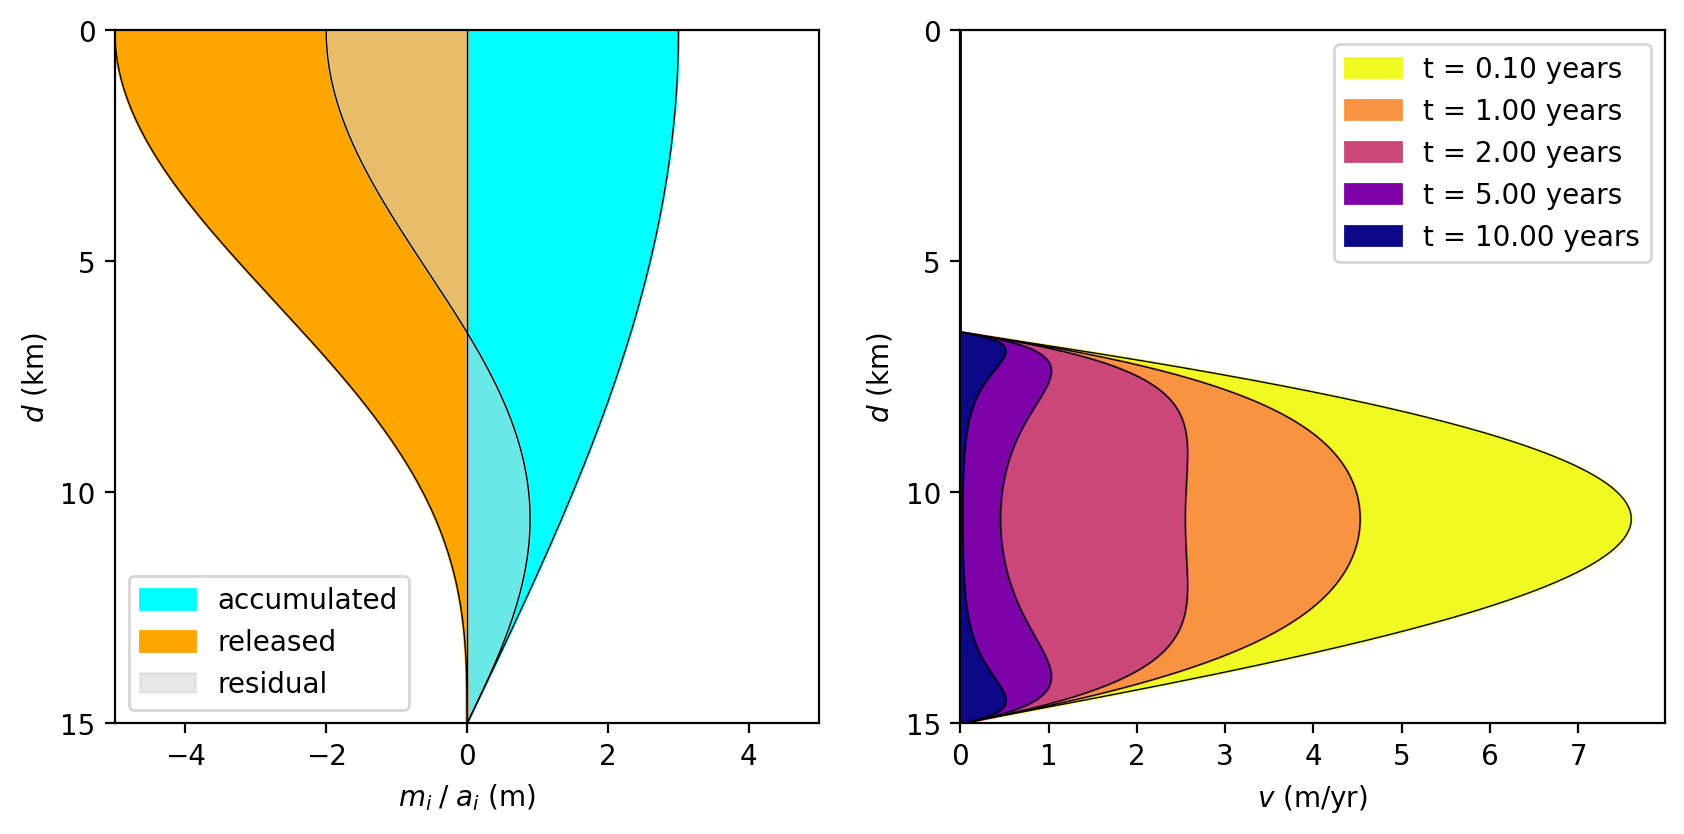

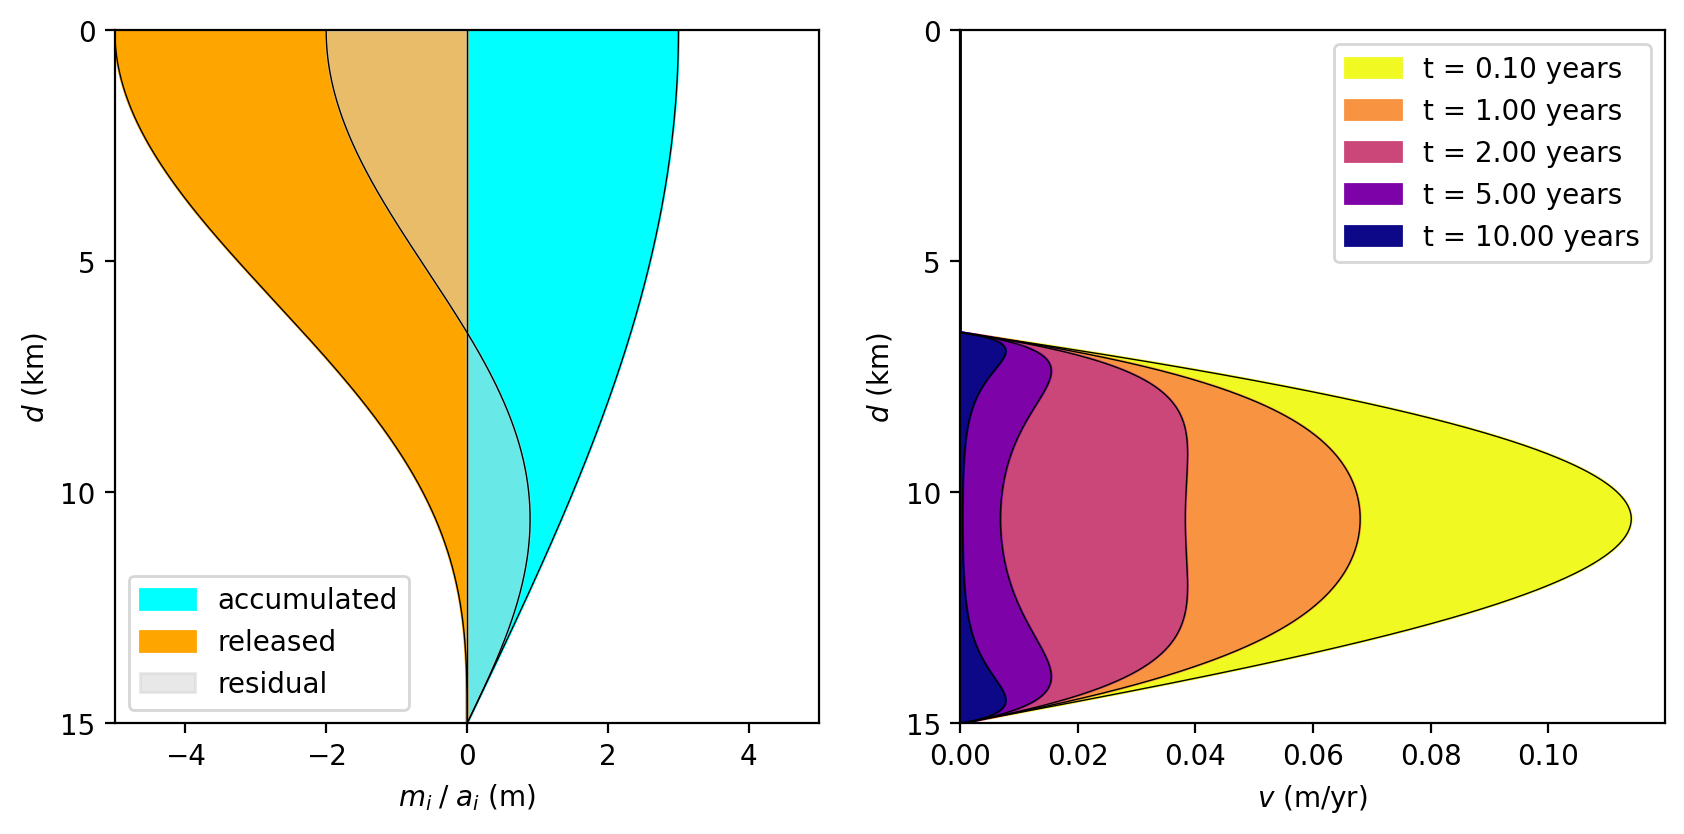

In [31]:
gamma = 0.1
n = n_pts
a = segment_area
c = 300
const = (c**2.0) * gamma / n * residual_geometric_moment / segment_area
t = np.linspace(0, 10 / Y2S, 5)
t = np.array([0.1, 1.0, 2.0, 5.0, 10.0]) / Y2S

v = np.zeros((n_pts, len(t)))
for i in range(len(t)):
    v[:, i] = (
        const
        * np.exp(-(c**2.0) * residual_geometric_moment * a * t[i])
    )
plot_geometric_moments_and_afterslip_velocities()


gamma = 0.1
c = 300
m_coseismic = 0.001
f = residual_geometric_moment
g = residual_geometric_moment
h = m_coseismic
V = calc_V(c, gamma, m_coseismic, g, h, f)
v0 = calc_v0(V, g, h)
t = np.array([0.1, 1.0, 2.0, 5.0, 10.0]) / Y2S

v = np.zeros((n_pts, len(t)))
for i in range(len(t)):
    v[:, i] = v0 * np.exp(-(c**2.0) * f * segment_area * t[i])
plot_geometric_moments_and_afterslip_velocities()


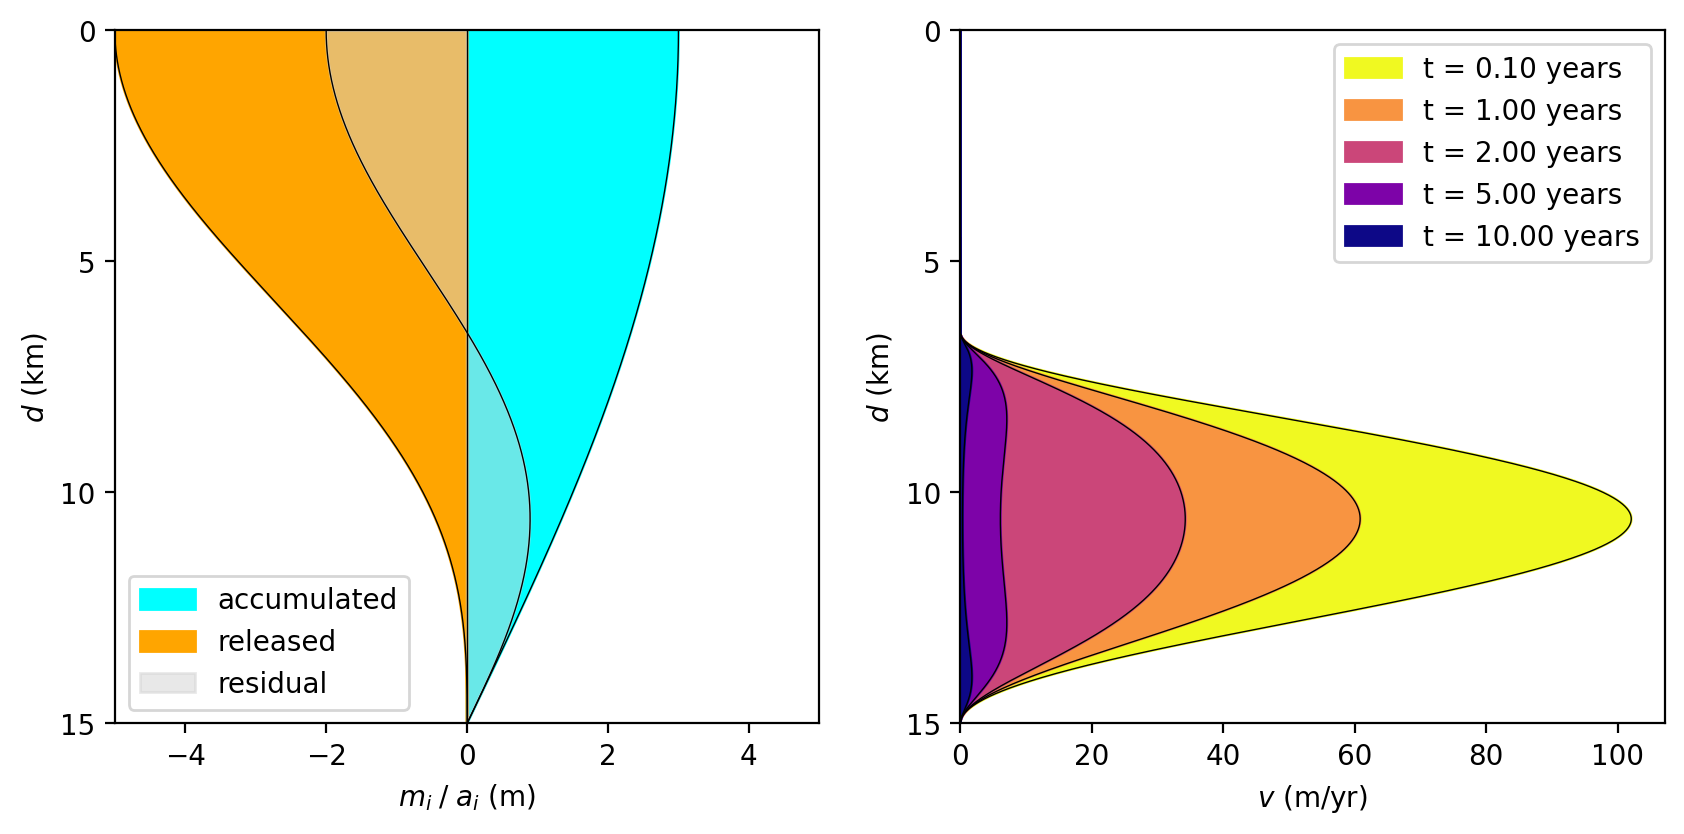

In [24]:
gamma = 0.1
n = n_pts
a = segment_area
c = 300
const = (c**2.0) * gamma / n
t = np.linspace(0, 10 / Y2S, 5)
t = np.array([0.1, 1.0, 2.0, 5.0, 10.0]) / Y2S
m_total = np.zeros(n_pts)
v = np.zeros((n_pts, len(t)))
for i in range(len(t)):
    v[:, i] = (
        const
        * residual_geometric_moment ** 2.0
        / segment_area
        * np.exp(-(c**2.0) * residual_geometric_moment**1.0 * a * t[i])
    )
    # m_total[i] = c**2.0 * gamma / n_pts * residual_geometric_moment 

plot_geometric_moments_and_afterslip_velocities()


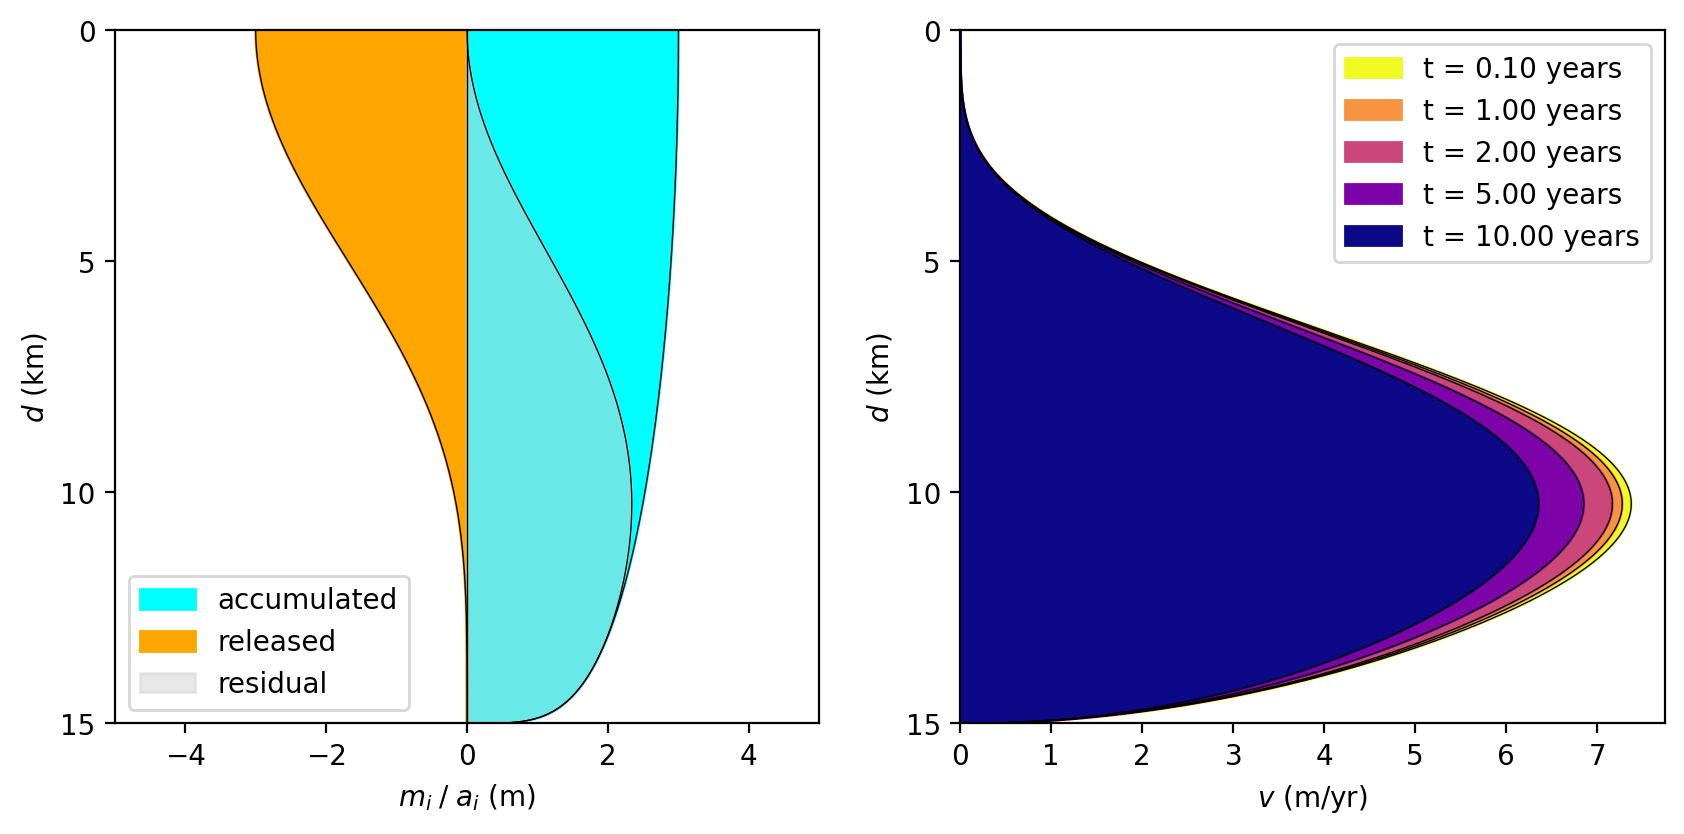

In [32]:
coseismic_slip_magnitude = 3.0
coseismic_slip = coseismic_slip_magnitude * np.cos(x / depth * np.pi / 2.0) ** 4.0
slip_deficit_rate = reference_slip_deficit_rate * np.cos(x / depth * np.pi / 2.0) ** 0.25
accumulated_geometric_moment = slip_deficit_rate * years * Y2S * segment_area
coseismic_geometric_moment = coseismic_slip * segment_area
residual_geometric_moment_all = accumulated_geometric_moment - coseismic_geometric_moment
residual_geometric_moment = residual_geometric_moment_all.copy()
residual_geometric_moment[residual_geometric_moment < 0] = 0

gamma = 0.1
n = n_pts
a = segment_area
c = 30
const = (c**2.0) * gamma / n

t = np.linspace(0, 10 / Y2S, 5)
t = np.array([0.1, 1.0, 2.0, 5.0, 10.0]) / Y2S
m_total = np.zeros(n_pts)
v = np.zeros((n_pts, len(t)))
for i in range(len(t)):
    v[:, i] = (
        const
        * residual_geometric_moment ** 2.0
        / segment_area
        * np.exp(-(c**2.0) * residual_geometric_moment**1.0 * a * t[i])
    )

plot_geometric_moments_and_afterslip_velocities()

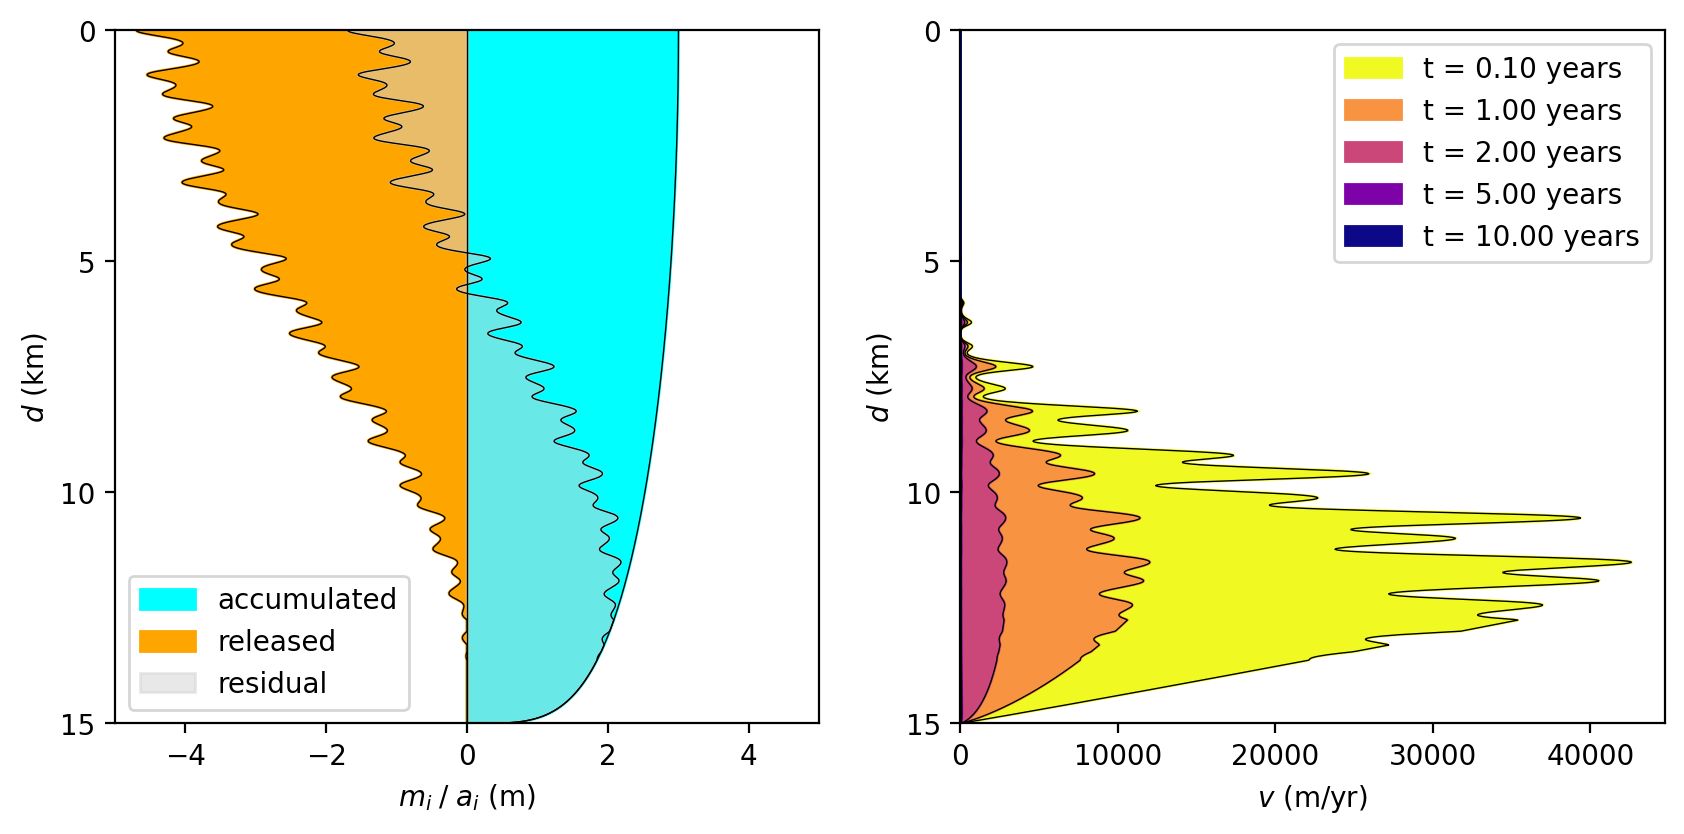

In [8]:
coseismic_slip_magnitude = 3.5
coseismic_slip = coseismic_slip_magnitude * np.cos(x / depth * np.pi / 2.0) ** 1.0

for i in range(5):
    factor = 1 / ((i + 1) ** 3)
    coseismic_slip += (
        1 / (i + 1) * np.random.rand(1) * np.cos(x / depth * np.pi / factor) ** 1.0
    )

coseismic_slip *= np.cos(x / depth * np.pi / 2.0) ** 1.0
coseismic_slip[coseismic_slip < 0.0] = 0.0

slip_deficit_rate = reference_slip_deficit_rate * np.cos(x / depth * np.pi / 2.0) ** (
    0.25
)
accumulated_geometric_moment = slip_deficit_rate * years * Y2S * segment_area
coseismic_geometric_moment = coseismic_slip * segment_area
residual_geometric_moment_all = (
    accumulated_geometric_moment - coseismic_geometric_moment
)
residual_geometric_moment = residual_geometric_moment_all.copy()
residual_geometric_moment[residual_geometric_moment < 0] = 0

gamma = 0.1
n = n_pts
a = segment_area
c = 300
const = (c**2.0) * gamma / n
const = (c**2.0) * gamma / np.sum(residual_geometric_moment)

t = np.linspace(0, 10 / Y2S, 5)
t = np.array([0.1, 1.0, 2.0, 5.0, 10.0]) / Y2S
m_total = np.zeros(n_pts)
v = np.zeros((n_pts, len(t)))
for i in range(len(t)):
    v[:, i] = (
        const
        * residual_geometric_moment**4.0
        / segment_area
        * np.exp(-(c**2.0) * residual_geometric_moment**1.0 * a * t[i])
    )
    # m_total[i] = c**2.0 * gamma / n_pts * residual_geometric_moment

plot_geometric_moments_and_afterslip_velocities()
